In [337]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [338]:
df1 = pd.read_excel('/Users/ved/Downloads/UpdatedFile.xlsx', sheet_name = '2013')

df = df1.drop(df1.index[8]) #dropping District of Columbia
df

,Geographic Area,Unnamed: 1,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,...,Construction,Land and Existing Structures,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
0,Alabama,NaN,7153244,7479000,811739,3898347,2443158,3747993,2317243,5031,...,514075,48094,8828,269.194281,232.861332,257.427838,218.575953,263.311059,225.718643,244.514851
1,Alaska,NaN,2545076,2665933,320938,1707449,516689,1324649,982442,10105,...,152912,77675,5747,281.559573,236.122004,261.256093,209.347288,271.407833,222.734646,247.071240
2,Arizona,NaN,8097916,7594979,1178356,2934165,3985395,3824071,2643742,4016,...,389936,18256,34459,279.722268,240.304911,260.448287,213.134131,270.085278,226.719521,248.402400
3,Arkansas,NaN,5050784,5189049,572096,3847045,631643,2545564,1694335,5319,...,358764,97017,19630,277.914802,239.890522,261.964491,218.523885,269.939647,229.207204,249.573425
4,California,NaN,66445919,66823475,7836263,35141208,23468448,34194878,20595508,5507,...,5683954,308018,24971,275.901351,233.654465,261.502456,212.545968,268.701903,223.100216,245.901060
5,Colorado,NaN,8782259,8652293,696266,3693829,4392164,4292898,2773716,5036,...,433023,150110,53030,289.681800,246.975708,271.009087,226.663220,280.345444,236.819464,258.582454
6,Connecticut,NaN,10106977,9505979,434543,3870444,5801990,5562212,2966636,10285,...,388835,(N),40701,285.243972,243.440297,274.459542,229.581599,279.851757,236.510948,258.181353
7,Delaware,NaN,1879594,1869552,151096,1124112,604386,1030897,560882,8637,...,146033,(N),3562,282.338299,243.107758,265.984981,225.771651,274.161640,234.439705,254.300672
9,Florida,NaN,24674105,25245400,3027018,9455562,12191525,13833236,7622221,5162,...,957191,75383,0,280.855840,241.675810,265.828297,227.463177,273.342068,234.569493,253.955781
10,Georgia,NaN,17455531,17305665,1805878,7580785,8068868,9555687,4956142,5616,...,1395483,31797,22522,279.179111,240.047237,264.615713,221.836713,271.897412,230.941975,251.419693


In [339]:
df.shape

(50, 28)

In [340]:
df.describe()

,Unnamed: 1,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,...,Other,Construction,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
count,0.0,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,...,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,NaN,1.192869e+07,1.193148e+07,1.085175e+06,5.476051e+06,5.367463e+06,6.432571e+06,3.627033e+06,6645.160000,3963.900000,...,3.637393e+05,7.097245e+05,40169.760000,284.288109,242.157550,266.670689,221.355478,275.479399,231.756514,253.617957
std,NaN,1.401800e+07,1.414984e+07,1.387883e+06,6.202517e+06,6.900875e+06,7.876060e+06,4.074430e+06,2027.789551,1159.903413,...,5.155182e+05,1.073524e+06,43226.763494,6.789973,5.221680,5.442091,6.301933,5.918115,5.531738,5.576083
min,NaN,1.314331e+06,1.329800e+06,1.135010e+05,4.080090e+05,5.806900e+04,6.632580e+05,3.906370e+05,4016.000000,1952.000000,...,2.999800e+04,1.248500e+04,0.000000,269.194281,231.105721,253.147818,205.756405,262.154393,219.268919,240.983261
25%,NaN,3.485890e+06,3.497672e+06,3.704730e+05,1.979046e+06,1.192931e+06,1.739406e+06,1.044096e+06,5231.250000,3241.000000,...,8.667475e+04,1.576825e+05,9310.250000,279.901856,239.604968,262.394403,217.506562,271.440829,228.846708,249.927467
50%,NaN,7.649644e+06,7.536990e+06,7.117330e+05,3.756557e+06,2.882854e+06,3.786032e+06,2.472881e+06,6122.000000,3612.500000,...,1.832925e+05,3.926630e+05,25733.000000,284.979498,242.373489,267.243993,222.784938,275.922589,232.778180,254.102805
75%,NaN,1.354007e+07,1.345363e+07,1.160620e+06,7.067681e+06,5.826017e+06,7.586812e+06,4.172386e+06,7557.250000,4663.000000,...,4.201645e+05,6.162120e+05,53076.500000,288.742126,245.833628,270.178608,225.661824,279.267440,235.318632,257.231983
max,NaN,6.644592e+07,6.682348e+07,7.836263e+06,3.514121e+07,3.243046e+07,3.875666e+07,2.059551e+07,13756.000000,7494.000000,...,3.002780e+06,5.683954e+06,213678.000000,300.568235,253.420961,277.009559,232.373156,288.788897,242.703471,265.746184


In [341]:
# df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"]] = df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"]]/df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"], ].max()

In [342]:
df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg"]] = df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg"]]/df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg"]].max()
# normalization
df

,Geographic Area,Unnamed: 1,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,...,Construction,Land and Existing Structures,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
0,Alabama,NaN,0.107655,7479000,0.103588,0.110934,0.075335,0.096706,0.112512,0.365731,...,0.090443,48094,0.041315,269.194281,232.861332,257.427838,218.575953,263.311059,225.718643,0.920107
1,Alaska,NaN,0.038303,2665933,0.040955,0.048588,0.015932,0.034179,0.047702,0.734589,...,0.026902,77675,0.026896,281.559573,236.122004,261.256093,209.347288,271.407833,222.734646,0.929726
2,Arizona,NaN,0.121872,7594979,0.150372,0.083496,0.122890,0.098669,0.128365,0.291945,...,0.068603,18256,0.161266,279.722268,240.304911,260.448287,213.134131,270.085278,226.719521,0.934736
3,Arkansas,NaN,0.076013,5189049,0.073006,0.109474,0.019477,0.065681,0.082267,0.386668,...,0.063119,97017,0.091867,277.914802,239.890522,261.964491,218.523885,269.939647,229.207204,0.939142
4,California,NaN,1.000000,66823475,1.000000,1.000000,0.723654,0.882297,1.000000,0.400334,...,1.000000,308018,0.116863,275.901351,233.654465,261.502456,212.545968,268.701903,223.100216,0.925323
5,Colorado,NaN,0.132172,8652293,0.088852,0.105114,0.135433,0.110765,0.134676,0.366095,...,0.076183,150110,0.248177,289.681800,246.975708,271.009087,226.663220,280.345444,236.819464,0.973043
6,Connecticut,NaN,0.152108,9505979,0.055453,0.110140,0.178906,0.143516,0.144043,0.747674,...,0.068409,(N),0.190478,285.243972,243.440297,274.459542,229.581599,279.851757,236.510948,0.971534
7,Delaware,NaN,0.028288,1869552,0.019282,0.031988,0.018636,0.026599,0.027233,0.627871,...,0.025692,(N),0.016670,282.338299,243.107758,265.984981,225.771651,274.161640,234.439705,0.956931
9,Florida,NaN,0.371341,25245400,0.386283,0.269073,0.375928,0.356925,0.370091,0.375254,...,0.168402,75383,0.000000,280.855840,241.675810,265.828297,227.463177,273.342068,234.569493,0.955633
10,Georgia,NaN,0.262703,17305665,0.230451,0.215724,0.248805,0.246556,0.240642,0.408258,...,0.245513,31797,0.105402,279.179111,240.047237,264.615713,221.836713,271.897412,230.941975,0.946090


In [343]:
X = df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"]].values
y = df['Overall Score Avg'].values

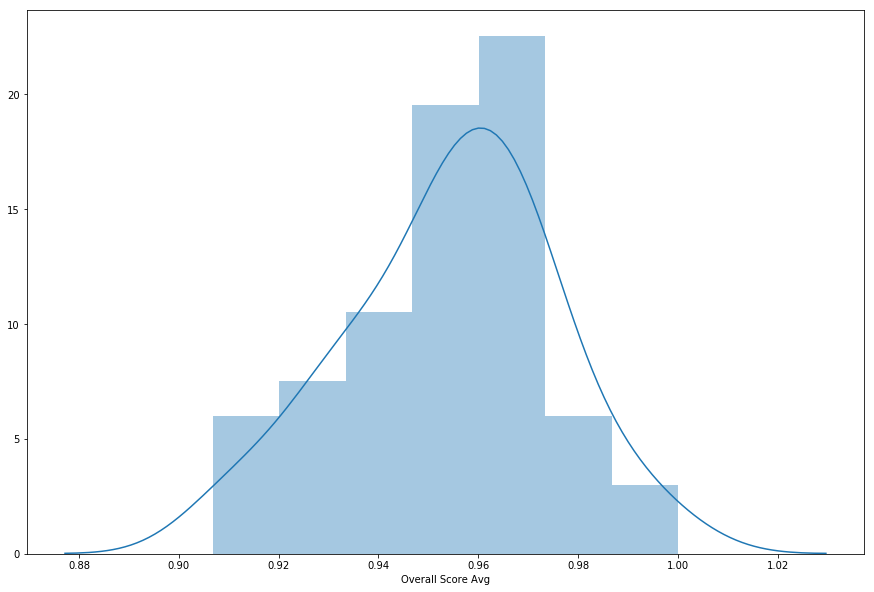

In [344]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Overall Score Avg'])

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [346]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [347]:
coeff_df = pd.DataFrame(regressor.coef_, ["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"], columns=['Coefficient'])  
coeff_df #arbitrary value to check coeffecients sizes relative to one another

,Coefficient
Total Revenue,0.504661
Federal Revenue,-0.129979
State Revenue,0.543200
Local Revenue,0.476791
Instructional Spending,-0.518853
Support System Spending,-0.127278
Per Pupil Instructional,0.051477
Pupils,-0.086729
Instructional Staff,0.125599
General Admin,-0.038066


In [348]:
y_pred = regressor.predict(X_test)

In [349]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.950831,0.910541
1,0.985924,0.968715
2,0.971534,0.982656
3,0.976184,0.987823
4,0.992455,0.964892
5,0.914344,0.928568
6,0.934736,0.930246
7,0.959526,0.942406
8,0.939142,0.950120
9,0.940993,0.976273


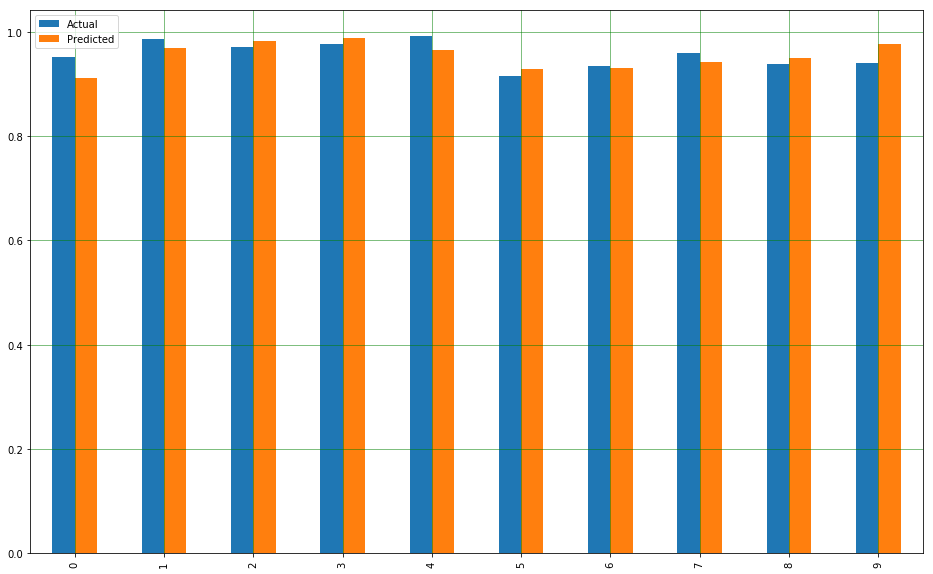

In [350]:
df2 = df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [351]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018991493588181918
Mean Squared Error: 0.00048190621447263967
Root Mean Squared Error: 0.021952362389333856
